## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.datasets
import idx2numpy

## Functions

In [2]:
#     Features:(n_examples, n_features)
#     Labels: (n_examples, 1)
#     Weights:(n_features, 1)


# -- Sigmoid function -- #
def sigmoid(z):
    " Return the sigmoid function "
    y = 1/(1 + np.exp(-z))
    return y

# -- Predictor function -- #
def predict(features, weights):
    '''
    Returns probabilities
    of class label
    '''
    z = np.dot(features, weights)
    return sigmoid(z)

# -- Cost function -- #
def cost_function(features, labels, weights):
    '''    
    Write down the average cross-entropy loss
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    # You may use this format or define in your own way
    # Note: This is for binary cros-entropy loss.
    
    # We can divide the binary cross entropy loss into two parts
    # One for p(y=1) and another for p(y=0)

    # Take the error when label=1
    class1_cost = np.dot(labels, np.log(predictions))

    # Take the error when label=0
    class2_cost = np.dot((1 - labels), np.log(1 - predictions))

    # Take the sum of both costs
    cost = class1_cost + class2_cost

    # Take the average cost
    cost = - (cost/observations)

    return cost


def update_weights(features, labels, weights, lr):
    '''
   Gradient Descent
    '''
    N = len(features.columns)# number of features

    #1 - Get Predictions
    predictions = predict(features, weights)
    

    gradient = np.dot((predictions - labels) , features)# Write down the gradient of the cost

    # 3 Take the average cost derivative for each feature
    gradient /= N

    # 4 Update the weights using the learning rate lr
    weights = weights - lr * gradient# Write down the update rule here

    return weights

def decision_boundary(prob):
    if prob >= .5 :
        return 1 
    elif prob >= .5 :
        return -1
    else :
        return 0 # You may change the threshold from 0.5 

def train(features, labels, weights, lr, iters):
    cost_history = [np.float64('inf')]

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        
        cost_history.append(cost)

        print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))

## Data

In [3]:
data = sklearn.datasets.make_classification(n_samples=8740, n_classes=4,n_clusters_per_class=1, n_features= 8,n_informative=4, n_redundant=0, n_repeated=0)

In [4]:
X = pd.DataFrame(data[0])# Features
y = data[1]# Target labels

In [5]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [6]:
x_train

,0,1,2,3,4,5,6,7
5746,-1.009866,-1.352830,-1.870270,-1.405252,-1.151386,0.149834,-0.261921,0.632879
1973,-0.833920,-1.676159,-2.696012,0.493521,0.949555,0.256214,0.012384,2.077210
7115,-0.552461,-1.026146,-0.461049,0.962780,0.884397,-0.541293,1.530944,-0.068825
6905,5.262174,1.205333,0.981548,0.311633,-0.053662,-0.551571,-0.367977,0.256074
409,-1.127672,-1.178266,-1.588210,-1.131452,0.762014,0.985269,-0.190420,-0.875983
...,...,...,...,...,...,...,...,...
3353,2.196861,0.850991,-1.903898,0.218921,-0.953511,1.216974,-1.737801,-0.122579
1725,1.795333,1.118491,-0.824733,-0.202749,-0.495598,0.087860,0.083123,-1.648708
2436,2.123473,1.097177,0.460092,-0.518517,-0.635316,-1.001533,-1.219612,0.382027
6902,0.017026,-0.634864,-1.384755,0.424698,1.227799,-1.798096,2.728316,1.724810


In [6]:
train_data = []
for i in np.unique(y_train) :
    l1 = np.zeros(len(y_train))
    l1[np.where(y_train == i)] = 1
    train_data.append(l1)


In [51]:
test_data = []
for i in np.unique(y_test) :
    l1 = np.zeros(len(y_test))
    l1[np.where(y_test == i)] = 1
    test_data.append(l1)

In [52]:
weights = []
losses = []
for i in train_data :
    # Initialize the weights
    wts = np.random.normal(0, 1, len(x_train.columns))
    # Training
    optimal_wts, loss = train(x_train, i, wts, 1e-5, 1000)
    weights.append(optimal_wts)
    losses.append(loss)
    

iter: 0 cost: 1.0493213411024176
iter: 1 cost: 1.0461468118770851
iter: 2 cost: 1.042984378083561
iter: 3 cost: 1.039834018413579
iter: 4 cost: 1.036695711346189
iter: 5 cost: 1.0335694351494247
iter: 6 cost: 1.0304551678819769
iter: 7 cost: 1.027352887394911
iter: 8 cost: 1.0242625713333398
iter: 9 cost: 1.0211841971381719
iter: 10 cost: 1.018117742047828
iter: 11 cost: 1.0150631831000065
iter: 12 cost: 1.0120204971334403
iter: 13 cost: 1.0089896607897084
iter: 14 cost: 1.0059706505150343
iter: 15 cost: 1.0029634425621359
iter: 16 cost: 0.9999680129920677
iter: 17 cost: 0.9969843376761209
iter: 18 cost: 0.9940123922977279
iter: 19 cost: 0.9910521523543901
iter: 20 cost: 0.9881035931596414
iter: 21 cost: 0.9851666898450281
iter: 22 cost: 0.9822414173621278
iter: 23 cost: 0.9793277504845674
iter: 24 cost: 0.9764256638101003
iter: 25 cost: 0.9735351317626774
iter: 26 cost: 0.9706561285945687
iter: 27 cost: 0.9677886283884839
iter: 28 cost: 0.9649326050597383
iter: 29 cost: 0.962088032358

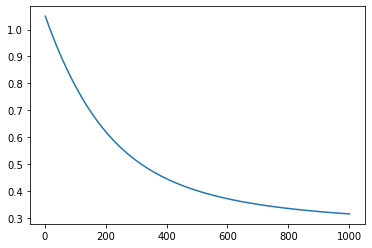

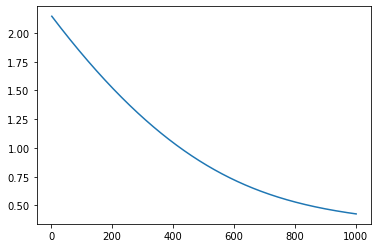

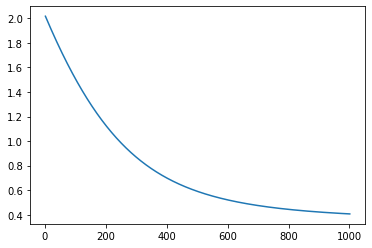

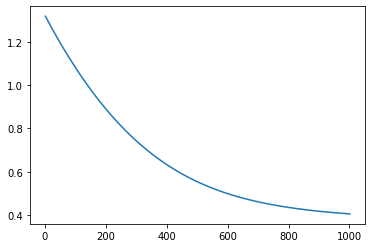

In [53]:
# Plot the loss against the number of epochs
for i in losses:
    plt.plot(np.arange(1, len(i)+1, 1), i)
    plt.show()

In [54]:
pred = []
for i in weights:
    predictions = []
    for elem in predict(x_train, i):
        predictions.append(decision_boundary(elem))
    pred.append(predictions)

In [55]:
test_pred = []
for i in weights:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred.append(predictions)

In [56]:
# Accuracy
for i in range(len(np.unique(y_train))):
    print("Training Accuracy using gradient descent: {}%".format(accuracy(pred[i],train_data[i]) * 100))

Training Accuracy using gradient descent: 87.68592677345538%
Training Accuracy using gradient descent: 80.76372997711671%
Training Accuracy using gradient descent: 82.02231121281464%
Training Accuracy using gradient descent: 81.89359267734554%


In [57]:
# Accuracy
gd_acc = []
for i in range(len(np.unique(y_test))):
    gd_acc.append(accuracy(test_pred[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {}%".format(accuracy(test_pred[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 87.29977116704805%
Testing Accuracy using gradient descent: 80.83524027459954%
Testing Accuracy using gradient descent: 81.86498855835241%
Testing Accuracy using gradient descent: 81.5217391304348%


## Scikit-Learn module

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
# L-BFGS
clf_lbfgs = LogisticRegression(solver= "lbfgs").fit(x_train, y_train)

# Newton-CG
clf_newt = LogisticRegression(solver= "newton-cg").fit(x_train, y_train)

In [60]:
lbfgs_wt = clf_lbfgs.coef_
newt_wt = clf_newt.coef_

In [61]:
test_pred_lbfgs = []
for i in lbfgs_wt:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred_lbfgs.append(predictions)

In [62]:
test_pred_newt = []
for i in newt_wt:
    predictions = []
    for elem in predict(x_test, i):
        predictions.append(decision_boundary(elem))
    test_pred_newt.append(predictions)

In [63]:
lbfgs_acc = []
for i in range(len(np.unique(y_train))):
    lbfgs_acc.append(accuracy(test_pred_lbfgs[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {}%".format(accuracy(test_pred_lbfgs[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 81.35011441647598%
Testing Accuracy using gradient descent: 84.7254004576659%
Testing Accuracy using gradient descent: 79.0045766590389%
Testing Accuracy using gradient descent: 77.23112128146454%


In [64]:
# Accuracy
newt_acc = []
for i in range(len(np.unique(y_test))):
    newt_acc.append(accuracy(test_pred_newt[i],test_data[i]) * 100)
    print("Testing Accuracy using gradient descent: {}%".format(accuracy(test_pred_newt[i],test_data[i]) * 100))

Testing Accuracy using gradient descent: 81.35011441647598%
Testing Accuracy using gradient descent: 84.7254004576659%
Testing Accuracy using gradient descent: 79.0045766590389%
Testing Accuracy using gradient descent: 77.23112128146454%
